In [1]:
# mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

In [23]:
import six

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'pdfs' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

In [3]:
mkdir $folder

mkdir: cannot create directory `pdfs': File exists


In [4]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,iPSC,included
3,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
4,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included


In [5]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
6,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
15,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,included
24,iPSC,exon:chr10:103360960-103361093:+@exon:chr10:10...,excluded,MN,bimodal
33,iPSC,exon:chr10:103563492-103563776:-@exon:chr10:10...,included,MN,bimodal
42,iPSC,exon:chr10:103567487-103567658:-@exon:chr10:10...,bimodal,MN,included


In [6]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count.head()

modality_x  modality_y
bimodal     bimodal        64
            excluded       19
            included       30
excluded    bimodal        63
            excluded      478
dtype: int64

In [7]:
ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,bimodal,excluded,included,uncategorized
modality_x,,,,
bimodal,64,19,30,NaN
excluded,63,478,3,1
included,151,NaN,1409,NaN
middle,NaN,NaN,1,NaN
uncategorized,22,1,NaN,NaN


In [8]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,bimodal,excluded,included,uncategorized
iPSC,,,,
bimodal,64,19,30,NaN
excluded,63,478,3,1
included,151,NaN,1409,NaN
middle,NaN,NaN,1,NaN
uncategorized,22,1,NaN,NaN


In [9]:
from anchor import MODALITY_ORDER

In [10]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,478,63,3,NaN,1
bimodal,19,64,30,NaN,NaN
included,NaN,151,1409,NaN,NaN
middle,NaN,NaN,1,NaN,NaN
uncategorized,1,22,NaN,NaN,NaN


In [11]:
sns.set(style='ticks', context='paper')

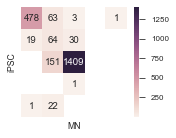

In [12]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_mn_modality_2d, annot=True, fmt='g')
ax.set(xticks=[], yticks=[])
# fig.axes[-1].yaxis.locator_params()
fig.tight_layout()
# fig.savefig('{}/ipsc_to_mn.pdf')

### Get percentages for comparison - use % of events in both

In [13]:
percentages = 100*ipsc_mn_modality_2d/ipsc_mn_modality_2d.sum(axis=1).sum()
percentages

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,21.320250,2.809991,0.133809,NaN,0.044603
bimodal,0.847458,2.854594,1.338091,NaN,NaN
included,NaN,6.735058,62.845674,NaN,NaN
middle,NaN,NaN,0.044603,NaN,NaN
uncategorized,0.044603,0.981267,NaN,NaN,NaN


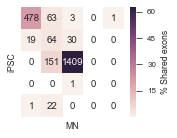

In [14]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, cbar_kws=dict(label='% Shared exons'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_mn_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_mn_modality_heatmap.pdf'.format(folder))

### iPSC-NPC $\Delta$ modality heatmap

In [15]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'NPC')
ipsc_npc_modalities = modality_transitions.loc[rows]
ipsc_npc_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
7,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included
16,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,NPC,included
25,iPSC,exon:chr10:103360960-103361093:+@exon:chr10:10...,excluded,NPC,bimodal
34,iPSC,exon:chr10:103563492-103563776:-@exon:chr10:10...,included,NPC,bimodal
43,iPSC,exon:chr10:103567487-103567658:-@exon:chr10:10...,bimodal,NPC,included


In [16]:
ipsc_npc_modality_count = ipsc_npc_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_npc_modality_2d = ipsc_npc_modality_count.unstack()
ipsc_npc_modality_2d.index.name = 'iPSC'
ipsc_npc_modality_2d.columns.name = 'NPC'
ipsc_npc_modality_2d = ipsc_npc_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_npc_percentages = 100*ipsc_npc_modality_2d/ipsc_npc_modality_2d.sum(axis=1).sum()
ipsc_npc_percentages

NPC,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,20.609838,2.515023,NaN,NaN,0.022257
bimodal,1.046072,5.341643,1.869575,NaN,NaN
included,NaN,5.809036,62.096595,NaN,NaN
middle,NaN,NaN,0.022257,NaN,NaN
uncategorized,0.044514,0.578678,NaN,NaN,0.044514


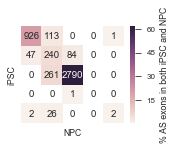

In [17]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_npc_percentages, cbar_kws=dict(label='% AS exons in both iPSC and NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_npc_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_npc_modality_heatmap.pdf'.format(folder))

## Statistical enrichment of motif changes

In [48]:
transitions = [(u'iPSC', u'NPC'), (u'iPSC', u'MN')]

In [49]:
hypergeom?

In [50]:
from scipy.stats import hypergeom

In [63]:
import itertools

lines = []

for phenotype1, phenotype2 in transitions:
    modality_subset = modality_transitions.query('(phenotype_x == @phenotype1) & (phenotype_y == @phenotype2)')
#     six.print_(phenotype1, phenotype2, modality_subset.shape)
    M = len(modality_subset['event_id'].unique())
    
    for modality1, modality2 in itertools.product(MODALITY_ORDER, repeat=2):
#         six.print_('\t', modality1, modality2)
        df1 = modality_subset.query('(phenotype_x == @phenotype1) & (modality_x == @modality1)')
        df2 = modality_subset.query('(phenotype_y == @phenotype2) & (modality_y == @modality2)')
        
        n = df1.shape[0]
        N = df2.shape[0]
        x = len(set(df1['event_id']) & set(df2['event_id']))
#         six.print_('\t\t', x, M, n, N)
        if x > 0:
            result = -hypergeom.logsf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype1, modality1, phenotype2, modality2, result])
enrichment = pd.DataFrame(lines, columns=['phenotype1', 'modality1', 'phenotype2', 'modality2', '$-\log_{10}(p)$'])
enrichment['$-\log_{10}(q)$'] = enrichment['$-\log_{10}(p)$'] - np.log10(enrichment.shape[0])
enrichment

,phenotype1,modality1,phenotype2,modality2,$-\log_{10}(p)$,$-\log_{10}(q)$
0,iPSC,excluded,NPC,excluded,1.741737e+03,1740.356644
1,iPSC,excluded,NPC,bimodal,1.654839e-04,-1.380046
2,iPSC,excluded,NPC,uncategorized,1.996064e+00,0.615853
3,iPSC,bimodal,NPC,excluded,2.370583e-06,-1.380209
4,iPSC,bimodal,NPC,bimodal,2.911432e+02,289.763036
5,iPSC,bimodal,NPC,included,1.696421e-13,-1.380211
6,iPSC,included,NPC,bimodal,2.509104e-12,-1.380211
7,iPSC,included,NPC,included,1.729303e+03,1727.923257
8,iPSC,middle,NPC,included,inf,inf
9,iPSC,uncategorized,NPC,excluded,2.777580e-02,-1.352435


In [67]:
enrichment_2d = enrichment.pivot_table(index=['phenotype1', 'modality1'], 
                                       columns=['phenotype2', 'modality2'], 
                                       values='$-\log_{10}(q)$')

phenotype2                       NPC                                          \
modality2                    bimodal     excluded     included uncategorized   
phenotype1 modality1                                                           
iPSC       bimodal        289.763036    -1.380209    -1.380211           NaN   
           excluded        -1.380046  1740.356644          NaN      0.615853   
           included        -1.380211          NaN  1727.923257           NaN   
           middle                NaN          NaN          inf           NaN   
           uncategorized   43.832486    -1.352435          NaN     13.749251   

phenotype2                       MN                                        
modality2                   bimodal    excluded    included uncategorized  
phenotype1 modality1                                                       
iPSC       bimodal        66.902768   -1.281461   -1.380211           NaN  
           excluded       -1.291298  881.971590   -1.380211           inf  
           included       -1.380211         NaN  834.874832           NaN  
           middle               NaN         NaN         inf           NaN  
           uncategorized  45.632654   -1.357004         NaN           NaN

In [69]:
columns = pd.MultiIndex.from_product([['NPC', 'MN'], MODALITY_ORDER])
index = pd.MultiIndex.from_product([['iPSC'], MODALITY_ORDER])

enrichment_2d = enrichment_2d.reindex(columns=columns, index=index)
enrichment_2d

NPC                                                \
                       excluded     bimodal     included middle uncategorized   
iPSC excluded       1740.356644   -1.380046          NaN    NaN      0.615853   
     bimodal          -1.380209  289.763036    -1.380211    NaN           NaN   
     included               NaN   -1.380211  1727.923257    NaN           NaN   
     middle                 NaN         NaN          inf    NaN           NaN   
     uncategorized    -1.352435   43.832486          NaN    NaN     13.749251   

                            MN                                              
                      excluded    bimodal    included middle uncategorized  
iPSC excluded       881.971590  -1.291298   -1.380211    NaN           inf  
     bimodal         -1.281461  66.902768   -1.380211    NaN           NaN  
     included              NaN  -1.380211  834.874832    NaN           NaN  
     middle                NaN        NaN         inf    NaN           NaN  
     uncategorized   -1.357004  45.632654         NaN    NaN           NaN

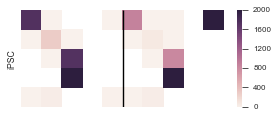

In [75]:
fig, ax = plt.subplots(figsize=(4, 1.75))
sns.heatmap(enrichment_2d, vmin=0, vmax=2000)

ymin, ymax = ax.get_ylim()
ax.vlines(5, ymin, ymax)
ax.set(xticks=[], yticks=[], ylabel='iPSC', xlabel='')
fig.tight_layout()

## Barplot of changes to/from bimodal

In [ ]:
modality_transitions.head()

In [ ]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

In [ ]:
transition_rows = modality_transitions.transition.isin(['iPSC-NPC', 'NPC-MN'])
delta_modality_rows = modality_transitions['modality_x'] != modality_transitions['modality_y']
modality_transitions_subset = modality_transitions.loc[transition_rows & delta_modality_rows]
modality_transitions_subset.head()

In [ ]:
delta_modalities = modality_transitions_subset.groupby(['transition', 'modality_x', 'modality_y']).size()
delta_modalities = delta_modalities.reset_index()
delta_modalities = delta_modalities.rename(columns={0: '# AS Exons'})
delta_modalities

In [ ]:
col = '$\Delta$ Modality'

# Label everythign as "Other" first
delta_modalities[col] = 'Other'

# From bimodal
delta_modalities.loc[delta_modalities['modality_x'] == 'bimodal', col] = 'Bimodal --> X'

# To Bimodal
delta_modalities.loc[delta_modalities['modality_y'] == 'bimodal', col] = 'X --> Bimodal'
delta_modalities

In [ ]:
delta_modalities['% Changing AS Exons'] = delta_modalities.groupby('transition')['# AS Exons'].apply(lambda x: 100*x/x.sum())
delta_modalities

In [ ]:
palette = sns.color_palette('Purples_r', n_colors=2) + ['k']
sns.palplot(palette)

In [ ]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(x='transition', y='% Changing AS Exons', palette=palette,
            hue=col, data=delta_modalities, ci=None, order=['iPSC-NPC', 'NPC-MN'])
ax.locator_params('y', nbins=4)
ax.set(ylabel='% Changing AS Exons')

sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
ax.legend_.set_visible(False)
fig.savefig('{}/changing_modalities_barplot_zoom.pdf'.format(folder))